In [1]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

nltk.download('stopwords')
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import spacy

import re
import string
import os

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\trala\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# pip install pyLDAvis

### Removing all blank lines in each text file

In [3]:
folder = 'Articles'

file_names = [file_name for file_name in os.listdir(folder) if file_name.endswith('.txt')]

for file_name in file_names:
    with open(os.path.join(folder, file_name), 'r', encoding='latin-1') as file:
        lines = file.readlines()
        
    lines = [line.strip() for line in lines if line.strip()]
    
    with open(os.path.join(folder, file_name), 'w', encoding='latin-1') as file:
        _=file.write('\n'.join(lines))
        _=file.truncate()

### Splitting each text file into individual articles:
- Create a separate folder called "Articles_split" where all the individual articles are stored
- Remove any articles that are blank

In [4]:
folder_out = 'Articles_split'

if not os.path.exists(folder_out):
    os.makedirs(folder_out)

end_pattern = r'Document\s+\w+'

file_names = [file_name for file_name in os.listdir(folder) if file_name.endswith('.txt')]

for file_name in file_names:
    with open(os.path.join(folder, file_name), 'r', encoding='latin-1') as file:
        file_contents = file.read()
        
    articles = re.split(end_pattern, file_contents) #splitting into articles based on end pattern
    
    # Write those splitted articles into separate text files and store in output folder defined above
    for i, article in enumerate(articles):
        article_filename = f'{os.path.splitext(file_name)[0]}_article_{i + 1}.txt'
        
        with open(os.path.join(folder_out, article_filename), 'w', encoding='latin-1') as output_file:
            _=output_file.write(article)
            
    # Removing blank articles:            
    if os.path.getsize(os.path.join(folder_out, article_filename)) == 0 or open(os.path.join(folder_out, article_filename), encoding='latin-1').read().isspace():
        _=os.remove(os.path.join(folder_out, article_filename))

### Preprocessing

In [5]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [6]:
processed_text = []

file_names = [file_name for file_name in os.listdir(folder_out) if file_name.endswith('.txt')]

for file_name in file_names:

    with open(os.path.join(folder_out, file_name), 'r', encoding='latin-1') as file:
        text = file.read().strip()

        #Remove punctuation:
        text = re.sub('[%s]' % re.escape(string.punctuation), '', text)

        #Remove numbers:
        text = re.sub(r'\d+', '', text)
        
        #Tokenization:
        words = word_tokenize(text)
        
        #Lowercase:
        words = [word.lower() for word in words]

        #Remove stopwords:
        words = [word for word in words if word not in stop_words]
        
        #Lemmatization:
        lemma = WordNetLemmatizer()
        words = [lemma.lemmatize(word) for word in words]

        #Stemming:
        stemmer = PorterStemmer()
        words = [stemmer.stem(word) for word in words]

        #Normalization and Cleaning:
        text = ' '.join(words)
        text = re.sub(r'[^\w\s]', '', text)
        text = re.sub(r'can\'t', 'cannot', text)

        processed_text.append(text)

### Removing stop words and finding top 30 common words

In [7]:
processed_words = []
corpus_words = []
for i in processed_text:
    processed_words.append(i.split())
    corpus_words.extend(i.split())

In [8]:
# import requests
# stopwords_list = requests.get("https://gist.githubusercontent.com/rg089/35e00abf8941d72d419224cfd5b5925d/raw/12d899b70156fd0041fa9778d657330b024b959c/stopwords.txt").content
# stop_words = set(stopwords_list.decode().splitlines())

In [9]:
freq_dist = nltk.FreqDist(corpus_words)
common_30 = freq_dist.most_common(30)

df_common_30 = pd.DataFrame(common_30, columns=['Common Words', 'Frequency'])
df_common_30

,Common Words,Frequency
0,said,11689
1,state,10321
2,mr,10022
3,trump,6915
4,islam,6706
5,new,6226
6,time,5948
7,u,4928
8,presid,4508
9,attack,4342


### Top 30 most common bigrams

In [10]:
bigrams = nltk.bigrams(corpus_words)
freq_dist_bigram = nltk.FreqDist(bigrams)
common_bigram_30 = freq_dist_bigram.most_common(30)

df_common_bigram_30 = pd.DataFrame(common_bigram_30, columns=['Common Bi-gram Words', 'Frequency'])
df_common_bigram_30

,Common Bi-gram Words,Frequency
0,"(islam, state)",5607
1,"(new, york)",3762
2,"(york, time)",3177
3,"(unit, state)",2855
4,"(mr, trump)",2373
5,"(right, reserv)",1627
6,"(english, copyright)",1489
7,"(compani, right)",1115
8,"(time, compani)",1114
9,"(white, hous)",1030


### Wordcloud for top 30 most common words

<Figure size 576x576 with 0 Axes>

(-0.5, 799.5, 799.5, -0.5)

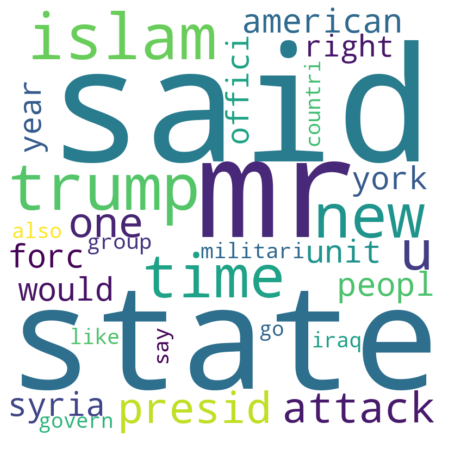

In [11]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(dict(common_30))

plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Trying something new

In [12]:
# def sent_to_words(sentences):
#     for sentence in sentences:
#         yield(gensim.utils.simple_preprocess(str(sentence), deacc=True)) # deacc=True removes punctuations
        
# data_words = list(sent_to_words(processed_text))

In [13]:
# print(data_words[:1])

In [14]:
# Build the bigram and trigram models
# bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
# trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
# # Faster way to get a sentence clubbed as a trigram/bigram
# bigram_mod = gensim.models.phrases.Phraser(bigram)
# trigram_mod = gensim.models.phrases.Phraser(trigram)
# See trigram example
# print(trigram_mod[bigram_mod[data_words[0]]])

In [15]:
# def remove_stopwords(texts):
#     return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

# def make_bigrams(texts):
#     return [bigram_mod[doc] for doc in texts]

# def make_trigrams(texts):
#     return [trigram_mod[bigram_mod[doc]] for doc in texts]

# def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
#     """https://spacy.io/api/annotation"""
#     texts_out = []
#     for sent in texts:
#         doc = nlp(" ".join(sent)) 
#         texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
#     return texts_out

In [16]:
# # Remove Stop Words
# data_words_nostops = remove_stopwords(data_words)

# # Form Bigrams
# data_words_bigrams = make_bigrams(data_words_nostops)

# # Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# # !python -m spacy download en_core_web_sm
# nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

# # Do lemmatization keeping only noun, adj, vb, adv
# data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

### Topic Modeling

In [17]:
from pprint import pprint
import gensim # Gensim for Topic Modeling
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [18]:
# Create Dictionary 
id2word = corpora.Dictionary(processed_words)

# Create Corpus 
texts = processed_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]


In [26]:
topics_no = 7

In [27]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=topics_no, #play with this number
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100, #keep this same
                                           passes=10, #keep this same
                                           alpha='auto',
                                           per_word_topics=True)

In [28]:
# Print the keyword of topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.010*"bank" + 0.010*"å" + 0.009*"wsj" + 0.009*"brief" + 0.008*"chines" + '
  '0.008*"ç" + 0.007*"korea" + 0.007*"u" + 0.007*"investor" + 0.006*"ä"'),
 (1,
  '0.010*"new" + 0.009*"time" + 0.006*"york" + 0.005*"mr" + 0.005*"year" + '
  '0.005*"one" + 0.005*"like" + 0.004*"world" + 0.004*"muslim" + 0.004*"â"'),
 (2,
  '0.026*"islam" + 0.024*"state" + 0.018*"said" + 0.017*"iraqi" + 0.016*"forc" '
  '+ 0.016*"iraq" + 0.013*"citi" + 0.011*"group" + 0.010*"mosul" + '
  '0.009*"milit"'),
 (3,
  '0.022*"mr" + 0.015*"said" + 0.014*"state" + 0.009*"compani" + 0.008*"secur" '
  '+ 0.008*"u" + 0.008*"accord" + 0.007*"countri" + 0.007*"offici" + '
  '0.007*"rule"'),
 (4,
  '0.022*"mr" + 0.021*"u" + 0.015*"state" + 0.014*"syria" + 0.014*"said" + '
  '0.012*"trump" + 0.010*"militari" + 0.009*"offici" + 0.008*"presid" + '
  '0.008*"american"'),
 (5,
  '0.012*"trump" + 0.011*"go" + 0.011*"think" + 0.010*"gigot" + 0.008*"presid" '
  '+ 0.007*"peopl" + 0.007*"say" + 0.007*"get" + 0.007*"right" + 

In [29]:
# Compute Perplexity
print('Perplexity: ', lda_model.log_perplexity(corpus))  

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

Perplexity:  -8.197888116706592

Coherence Score:  0.4584708038642488


In [30]:
# Visualize the topics
import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.057841 -0.109943       1        1  27.717786
4      0.100567 -0.005725       2        1  19.635300
5      0.005744 -0.232951       3        1  19.486041
2      0.127903  0.135102       4        1  12.805273
6      0.077894  0.169227       5        1  10.291471
3      0.031649 -0.010162       6        1   8.375516
0     -0.401599  0.054450       7        1   1.688612, topic_info=          Term          Freq         Total Category  logprob  loglift
420         mr   9301.000000   9301.000000  Default  30.0000  30.0000
123      islam   7151.000000   7151.000000  Default  29.0000  29.0000
22      attack   4465.000000   4465.000000  Default  28.0000  28.0000
204       said  11331.000000  11331.000000  Default  27.0000  27.0000
224      state   9580.000000   9580.000000  Default  26.0000  26.0000
...        ...           ...           ...      ...      ...      ...
49     compani     73.188229   3190.363843   Topic7  -5.5346   0.3064
14329      dow     66.468416   1697.764939   Topic7  -5.6310   0.8409
152       news     63.426547   1707.271313   Topic7  -5.6778   0.7885
238      trump     63.720162   5618.814700   Topic7  -5.6732  -0.3981
2443      bill     54.208708    665.436365   Topic7  -5.8348   1.5737

[547 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
6143       4  0.996683       abadi
33873      4  0.989709  abdulrahim
15705      5  0.996892       abedi
32841      6  0.985582    aboutaam
32139      7  0.983759         aca
...      ...       ...         ...
35082      7  0.972781          åå
34205      7  0.988160           æ
34401      7  0.993667           ç
34407      7  0.973810           è
35128      7  0.937705           é

[1243 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 6, 3, 7, 4, 1])

In [24]:
# Create the output directory if it doesn't exist
if not os.path.exists('output_summaries'):
    os.makedirs('output_summaries')

In [25]:
# Storing model summaries into output file 
with open(f'output_summaries/lda_summary_{topics_no}_.txt', 'w') as f:
    _=f.write('Number of Topics: '+str(topics_no)+'\n')
    _=f.write('\n'+str(lda_model.print_topics(num_topics=topics_no, num_words=10))+'\n')
    _=f.write('\nPerplexity: '+str(lda_model.log_perplexity(corpus))+'\n')
    _=f.write('\nCoherence Score: '+str(coherence_lda))